In [2]:
import pycaret 
import pandas as pd

In [25]:
data = pd.read_csv(r"/Users/user/Downloads/10_RapidKL_Hackthon/data_model.csv")

In [26]:
print(data.shape)
print(data.columns)

(14678, 50)
Index(['ope_date', 'depot_id', 'line_id_x', 'bus_no', 'point_a', 'point_b',
       'ttl_td_id', 'ttl_captain_id', 'ttl_point_a', 'ttl_point_b',
       'max_diff_minutes_from_point_a', 'max_diff_minutes_idle_mode',
       'max_diff_minutes_to_point_a', 'min_diff_minutes_from_point_a',
       'min_diff_minutes_idle_mode', 'min_diff_minutes_to_point_a',
       'avg_diff_minutes_from_point_a', 'avg_diff_minutes_idle_mode',
       'avg_diff_minutes_to_point_a', 'med_diff_minutes_from_point_a',
       'med_diff_minutes_idle_mode', 'med_diff_minutes_to_point_a',
       'max_speed', 'min_speed', 'avg_speed', 'med_speed', 'ttl_td_completed',
       'line_id_y', 'br_id', 'br_repair_status', 'br_entry_status', 'br_date',
       'br_date_entry', 'br_target_completed', 'br_ttl_days', 'rtd_id',
       'rtd_date', 'route_id', 'bus_model_id', 'driver_id', 'rtd_cause',
       'cause_remark', 'fc_remark', 'date_issues', 'capt_id', 'bcc_acc_id',
       'acc_date', 'bus_damage', 'eng_find', 'l

In [27]:
data.head(2)

,ope_date,depot_id,line_id_x,bus_no,point_a,point_b,ttl_td_id,ttl_captain_id,ttl_point_a,ttl_point_b,...,rtd_cause,cause_remark,fc_remark,date_issues,capt_id,bcc_acc_id,acc_date,bus_damage,eng_find,label
0,2022-10-01,10,K1000,CDH7753,H/BANDAR,GAMBANG RESORT,14,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal trip
1,2022-10-01,10,K1000,CDD1442,H/BANDAR,GAMBANG RESORT,12,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal trip


In [28]:
data = data.drop(['ope_date'], axis=1)
data = data.drop(['br_date'], axis=1)
data = data.drop(['br_date_entry'], axis=1)
data = data.drop(['date_issues'], axis=1)
data = data.drop(['acc_date'], axis=1)

In [29]:
from pycaret.classification import *
s = setup(data, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Target mapping,"accident: 0, engine repair: 1, normal trip: 2, return to depot: 3"
4,Original data shape,"(14678, 45)"
5,Transformed data shape,"(14678, 75)"
6,Transformed train set shape,"(10274, 75)"
7,Transformed test set shape,"(4404, 75)"
8,Numeric features,30
9,Categorical features,14


In [30]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [31]:
# init setup on exp
exp.setup(data, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Target mapping,"accident: 0, engine repair: 1, normal trip: 2, return to depot: 3"
4,Original data shape,"(14678, 45)"
5,Transformed data shape,"(14678, 75)"
6,Transformed train set shape,"(10274, 75)"
7,Transformed test set shape,"(4404, 75)"
8,Numeric features,30
9,Categorical features,14


In [32]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9998,0.3000,0.9998,0.9999,0.9999,0.9995,0.9995,0.1120
rf,Random Forest Classifier,0.9998,0.3000,0.9998,0.9997,0.9998,0.9995,0.9995,0.2340
et,Extra Trees Classifier,0.9998,0.3000,0.9998,0.9998,0.9998,0.9995,0.9995,0.2590
gbc,Gradient Boosting Classifier,0.9997,0.3000,0.9997,0.9997,0.9997,0.9993,0.9993,2.7840
knn,K Neighbors Classifier,0.9944,0.2978,0.9944,0.9941,0.9941,0.9855,0.9857,0.1320
nb,Naive Bayes,0.9935,0.2999,0.9935,0.9940,0.9936,0.9837,0.9839,0.1050
ridge,Ridge Classifier,0.9877,0.0000,0.9877,0.9877,0.9875,0.9685,0.9688,0.0930
lda,Linear Discriminant Analysis,0.9845,0.2992,0.9845,0.9875,0.9857,0.9604,0.9607,0.1830
ada,Ada Boost Classifier,0.9306,0.2591,0.9306,0.8670,0.8974,0.7998,0.8207,0.2640
qda,Quadratic Discriminant Analysis,0.8958,0.1998,0.8958,0.8958,0.8955,0.8891,0.8892,0.1140


In [33]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9998,0.3000,0.9998,0.9999,0.9999,0.9995,0.9995,0.1120
rf,Random Forest Classifier,0.9998,0.3000,0.9998,0.9997,0.9998,0.9995,0.9995,0.1120
et,Extra Trees Classifier,0.9998,0.3000,0.9998,0.9998,0.9998,0.9995,0.9995,0.1030
gbc,Gradient Boosting Classifier,0.9997,0.3000,0.9997,0.9997,0.9997,0.9993,0.9993,0.1370
knn,K Neighbors Classifier,0.9944,0.2978,0.9944,0.9941,0.9941,0.9855,0.9857,0.1200
nb,Naive Bayes,0.9935,0.2999,0.9935,0.9940,0.9936,0.9837,0.9839,0.0980
ridge,Ridge Classifier,0.9877,0.0000,0.9877,0.9877,0.9875,0.9685,0.9688,0.0760
lda,Linear Discriminant Analysis,0.9845,0.2992,0.9845,0.9875,0.9857,0.9604,0.9607,0.0940
ada,Ada Boost Classifier,0.9306,0.2591,0.9306,0.8670,0.8974,0.7998,0.8207,0.1170
qda,Quadratic Discriminant Analysis,0.8958,0.1998,0.8958,0.8958,0.8955,0.8891,0.8892,0.0980


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

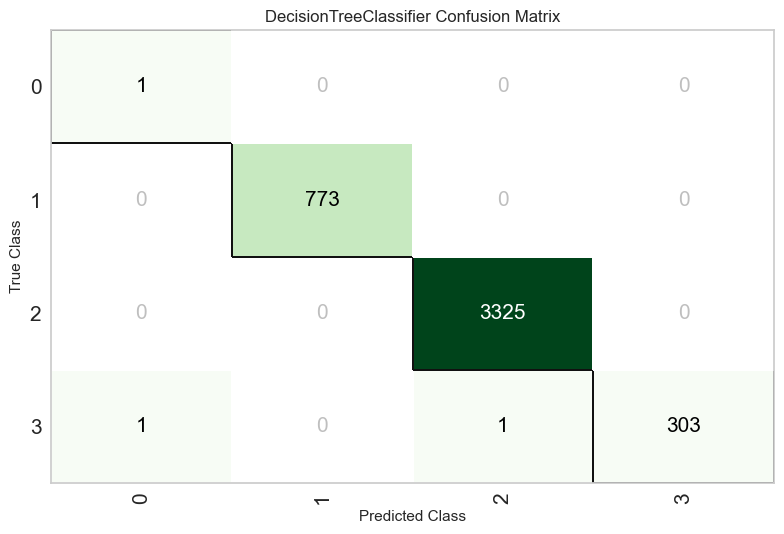

In [34]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

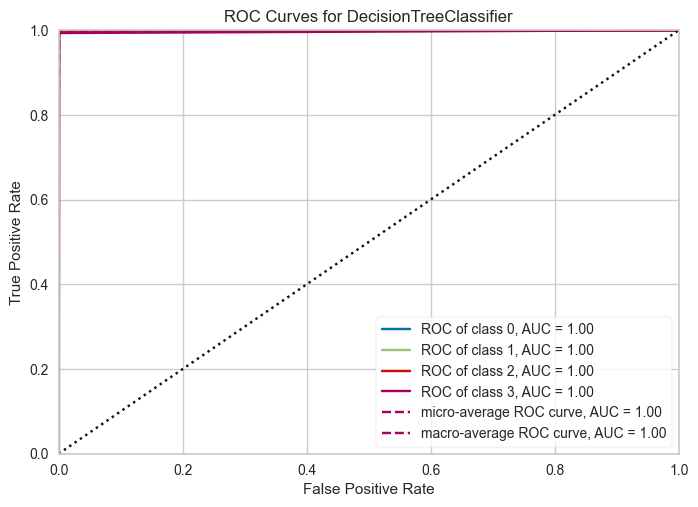

In [35]:
# plot AUC
plot_model(best, plot = 'auc')

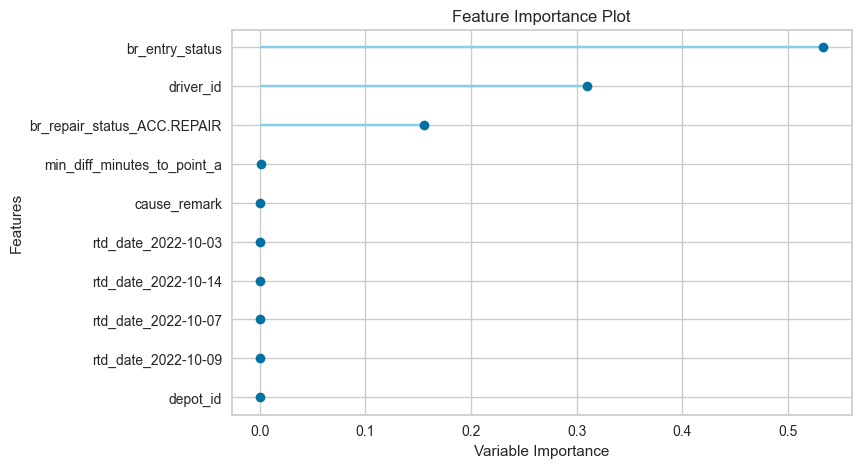

In [36]:
# plot feature importance
plot_model(best, plot = 'feature')

In [37]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9995,0.9994,0.9995,0.9997,0.9996,0.9988,0.9988


In [38]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('label', axis=1, inplace=True)
new_data.head()

,depot_id,line_id_x,bus_no,point_a,point_b,ttl_td_id,ttl_captain_id,ttl_point_a,ttl_point_b,max_diff_minutes_from_point_a,...,route_id,bus_model_id,driver_id,rtd_cause,cause_remark,fc_remark,capt_id,bcc_acc_id,bus_damage,eng_find
0,10,K1000,CDH7753,H/BANDAR,GAMBANG RESORT,14,1,1,1,84.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,K1000,CDD1442,H/BANDAR,GAMBANG RESORT,12,1,1,1,158.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,K1000,CDH2338,H/BANDAR,GAMBANG RESORT,12,1,1,1,83.283333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,K1000,CDH5966,H/BANDAR,GAMBANG RESORT,12,1,1,1,79.983333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,K1000,CDH7750,H/BANDAR,GAMBANG RESORT,8,1,1,1,114.933333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,depot_id,line_id_x,bus_no,point_a,point_b,ttl_td_id,ttl_captain_id,ttl_point_a,ttl_point_b,max_diff_minutes_from_point_a,...,driver_id,rtd_cause,cause_remark,fc_remark,capt_id,bcc_acc_id,bus_damage,eng_find,prediction_label,prediction_score
0,10,K1000,CDH7753,H/BANDAR,GAMBANG RESORT,14,1,1,1,84.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal trip,1.0
1,10,K1000,CDD1442,H/BANDAR,GAMBANG RESORT,12,1,1,1,158.949997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal trip,1.0
2,10,K1000,CDH2338,H/BANDAR,GAMBANG RESORT,12,1,1,1,83.283333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal trip,1.0
3,10,K1000,CDH5966,H/BANDAR,GAMBANG RESORT,12,1,1,1,79.983330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,engine repair,1.0
4,10,K1000,CDH7750,H/BANDAR,GAMBANG RESORT,8,1,1,1,114.933334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,engine repair,1.0


In [40]:
predictions.columns

Index(['depot_id', 'line_id_x', 'bus_no', 'point_a', 'point_b', 'ttl_td_id',
       'ttl_captain_id', 'ttl_point_a', 'ttl_point_b',
       'max_diff_minutes_from_point_a', 'max_diff_minutes_idle_mode',
       'max_diff_minutes_to_point_a', 'min_diff_minutes_from_point_a',
       'min_diff_minutes_idle_mode', 'min_diff_minutes_to_point_a',
       'avg_diff_minutes_from_point_a', 'avg_diff_minutes_idle_mode',
       'avg_diff_minutes_to_point_a', 'med_diff_minutes_from_point_a',
       'med_diff_minutes_idle_mode', 'med_diff_minutes_to_point_a',
       'max_speed', 'min_speed', 'avg_speed', 'med_speed', 'ttl_td_completed',
       'line_id_y', 'br_id', 'br_repair_status', 'br_entry_status',
       'br_target_completed', 'br_ttl_days', 'rtd_id', 'rtd_date', 'route_id',
       'bus_model_id', 'driver_id', 'rtd_cause', 'cause_remark', 'fc_remark',
       'capt_id', 'bcc_acc_id', 'bus_damage', 'eng_find', 'prediction_label',
       'prediction_score'],
      dtype='object')

In [42]:
save_model(best, 'Rapid_multiclassification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/90/0dsv350s24j__4rhx_slnfg40000gn/T/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['depot_id', 'ttl_td_id',
                                              'ttl_captain_id', 'ttl_point_a',
                                              'ttl_point_b',
                                              'max_diff_minutes...
                                                               hierarchy=None,
                                                               min_samples_leaf=20,
                                                               return_df=True,
                                                               smoothing=10,
                            